<a href="https://colab.research.google.com/github/rodrigowe1988/Data-Science-na-Pratica/blob/main/Dados_do_Airbnb_para_a_cidade_de_Porto_PT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise dos Dados do Airbnb - cidade qualquer

O [Airbnb](https://www.airbnb.com.br/?landing_page_section=HEADER) já é considerado **a maior empresa hoteleira da atualidade**, detalhe: não possui nenhum hotel. 

Com o intuito de conectar pessoas que precisam de um lugar para hospedarem-se com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup criada 10 anos antes, já havia hospedado __mais de 300 milhões de pessoas__ ao redor de todo o mundo.

Uma das iniciativas do Airbnv é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) é possível baixar uma grande quantidade de dados para se desenvolver projetos e soluções de Data Science.

A seguir iremos analisar os dados referente à cidade de Porto no norte de Portugal.

<img src="https://viagemeturismo.abril.com.br/wp-content/uploads/2017/05/istock-533960357-1.jpg?resize=920,613">

Porto é uma cidade costeira no noroeste de Portugal conhecida pelas pontes imponentes e pela produção de vinho do Porto. No distrito medieval de Ribeira, às margens do rio, ruas estreitas de paralelepípedos passam pelas casas e pelos restaurantes dos comerciantes. A Igreja de São Francisco é conhecida pelo interior barroco exuberante com esculturas douradas ornamentadas. O suntuoso Palácio da Bolsa, do século XIX, era um mercado de ações e foi construído para impressionar investidores europeus em potencial. 

##Obtenção dos dados

Todos os dados usados nesse notebook foram obtidos do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html)

Para essa análise, foi utilizado somente o arquivo listings.csv da cidade do Porto em Portugal.

In [2]:
#importando os pacotes necessários 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#importar o arquivo do Airbnb com os dados da cidade de Porto
df = pd.read_csv("http://data.insideairbnb.com/portugal/norte/porto/2021-02-13/visualisations/listings.csv")

Análise dos Dados
Dicionário das variáveis

* id - número de id gerado para identificar o imóvel

* name - nome da propriedade anunciada

* host_id - número de id do proprietário (anfitrião) da propriedade

* host_name - Nome do anfitrião

* neighbourhood_group - esta coluna não contém nenhum valor válido

* neighbourhood - nome do bairro

* latitude - coordenada da latitude da propriedade

* longitude - coordenada da longitude da propriedade

* room_type - informa o tipo de quarto que é oferecido

* price - preço para alugar o imóvel

* minimum_nights - quantidade mínima de noites para reservar

* number_of_reviews - número de reviews que a propriedade possui

* last_review - data do último review

* reviews_per_month - quantidade de reviews por mês

* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião

* availability_365 - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataset, analisando as 5 primeiras entradas.

In [4]:
#imprimindo na tela as 5 primeiras entradas do DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,41339,Porto city flat near the sea,180050,Paula,PORTO,Lordelo do Ouro e Massarelos,41.15010,-8.66035,Entire home/apt,75,5,17,2018-09-28,0.18,1,222
1,42462,Large Penthouse in Vila Nova Gaia,185492,Gabriela,VILA NOVA DE GAIA,Mafamude e Vilar do Paraíso,41.10739,-8.59430,Entire home/apt,73,30,39,2018-10-14,0.39,3,166
2,55111,Fontielas Houses |Floor1 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17481,-8.35362,Entire home/apt,66,3,14,2019-09-07,0.21,3,0
3,73828,Fontielas Houses |Floor0 in House with shared ...,259711,Isabel E João,PAREDES,Cete,41.17449,-8.35426,Entire home/apt,66,3,8,2019-07-22,0.11,3,0
4,76436,Go2oporto @ River Side,399503,Go2oporto,PORTO,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",41.13951,-8.61453,Entire home/apt,137,2,184,2020-08-13,1.63,13,358


##Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis? 

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este dataset que baixamos é a versão "resumida" disponibilizada pelo Airbnb. Na mesma página, há uma versão mais completa com 35847 entradas e 106 variáveis(listings.csv.gz).

In [5]:
#identificar o volume de dados do DataFrame
print(f'Entradas:\t{df.shape[0]}')
print(f'Variáveis:\t{df.shape[1]}')

#verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	11128
Variáveis:	16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
#na próxima parte da análise exploraremos os dados ausentes do nosso dataframe
df.isnull().sum()

id                                   0
name                                 1
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2040
reviews_per_month                 2040
calculated_host_listings_count       0
availability_365                     0
dtype: int64

##Q2. Qual a porcentagem de valores ausentes no dataset?

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos para nossa análise.

* É possível ver que a coluna neighbourhood_group possui 100% dos seus valores faltantes.

* As variáveis reviews_per_month e last_review possuem os valores nulos em quase metade das linhas.

* As variáveis name e host_name têm aproximadamente 0,1% dos valores nulos.

In [10]:
#ordenar em ordem decrescente as variáveis por seus valores ausentes
print('Porcentagem do meu dataset que está com valores ausentes (separado por linha):')
print()
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

Porcentagem do meu dataset que está com valores ausentes (separado por linha):



reviews_per_month                 18.332135
last_review                       18.332135
host_name                          0.035945
name                               0.008986
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
price                              0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
id                                 0.000000
dtype: float64

##Q3. Qual o tipo de distribuição das variáveis?

Para identificar a distribuição das variáveis, plotamos a seguir um histograma para melhor visualização dos dados.

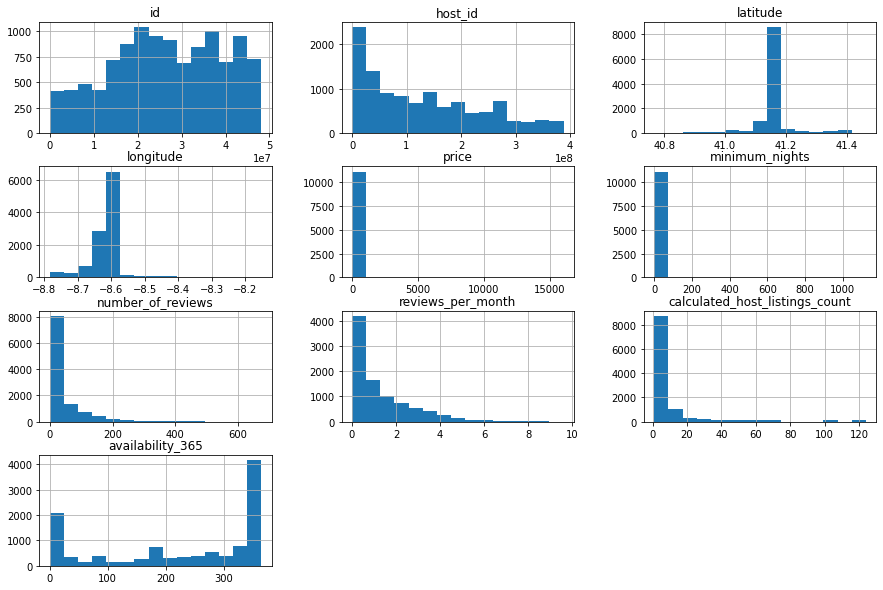

In [12]:
#plotar o histograma daa variáveis numéricas
df.hist(bins=15, figsize=(15, 10));

##Q3. Há outliers presentes? 

Pela distribuição desse histograma é possível verificar indícios da presença de outliers(dados 'fora da curva'). Olhe, por exemplo, os gráficos da variável **price**, **minimum_nights** e **calculated_host_listings_count**. 

Os valores acabam distorcendo completamente os dados. Por exemplo na variável price, os preços variam entre 0 e mais de 10k euros a diária!!!



In [14]:
#ver o resumo estatístico das variáveis numéricas (usando o método "describe")
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11128.000000,11128.00000,11128.000000,9088.000000,11128.000000,11128.000000
mean,78.373113,3.12518,41.500090,1.267349,10.317937,226.730050
std,297.711681,15.87678,69.412309,1.361272,20.100679,141.392307
min,8.000000,1.00000,0.000000,0.010000,1.000000,0.000000
25%,35.000000,1.00000,1.000000,0.230000,1.000000,89.000000
50%,52.000000,2.00000,12.000000,0.740000,4.000000,278.000000
75%,75.000000,2.00000,51.000000,1.900000,8.000000,361.000000
max,16042.000000,1123.00000,675.000000,9.610000,124.000000,365.000000


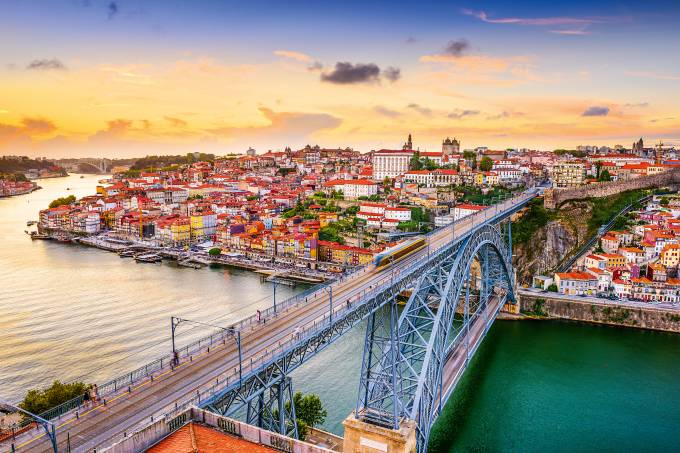